In [1]:
import glob
import numpy as np
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
%matplotlib inline
from matplotlib.font_manager import FontProperties
#from plotnine import *

In [2]:
names = glob.glob("/home/roi/GM_SG/results/exp2/*")

In [3]:
names = names[1:]
names

['/home/roi/GM_SG/results/exp2/mean0.1var0.5.csv',
 '/home/roi/GM_SG/results/exp2/mean0.01var0.5.csv',
 '/home/roi/GM_SG/results/exp2/mean0.03162277660168379var0.5.csv',
 '/home/roi/GM_SG/results/exp2/mean1.0var0.5.csv',
 '/home/roi/GM_SG/results/exp2/mean0.31622776601683794var0.5.csv']

In [4]:
for i in range(len(names)):
    #
    if i == 0:
        #
        final = pd.read_csv(names[i])
        mean = re.findall("\d+\.\d+", names[i])
        final["Mean"] = float(mean[0])
        #
    else:
        #
        curr = pd.read_csv(names[i])
        mean = re.findall("\d+\.\d+", names[i])
        curr["Mean"] = float(mean[0])
        final = pd.concat([final,curr])
        
all_means = list(set(final["Mean"]))
all_means.sort()

In [5]:
variables = final.columns
variables = variables[1:-1]
stds = final.groupby(["Mean"], as_index=False)[variables].std()
means = final.groupby(["Mean"], as_index=False)[variables].mean()

In [6]:
stds

,Mean,raw_cleandata,raw_atdata,nash_rawdata,nash_atdata,bayes_rawdata,bayes_atdata
0,0.100000,0.015237,0.024205,0.015404,0.024357,0.017969,0.025048
1,0.177828,0.014887,0.021629,0.015074,0.021883,0.019357,0.021257
2,0.316228,0.009452,0.019251,0.012366,0.017274,0.008238,0.010846
3,0.562341,0.019542,0.026290,0.031630,0.023449,0.016767,0.018988
4,1.000000,0.014977,0.045276,0.055237,0.027878,0.012368,0.016734


## RMSE vs Mean of adversary distribution

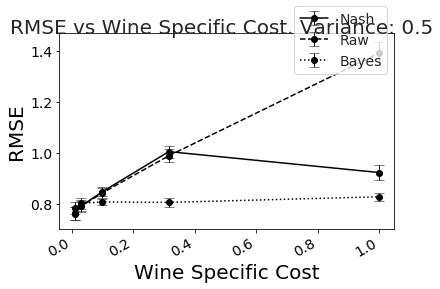

In [7]:

means1 = means
devs1 = stds

t = "RMSE vs Wine Specific Cost. Variance: 0.5"
x = means1["Mean"]
#
y1 = means1["nash_atdata"]
y2 = means1["raw_atdata"]
y3 = means1["bayes_atdata"]
#
y1dev = devs1["nash_atdata"]
y2dev = devs1["raw_atdata"]
y3dev = devs1["bayes_atdata"]

f,ax2 = plt.subplots(1,1,sharex=True, facecolor='w')
sns.set_style("whitegrid")
# Plot distributions
ax2.errorbar(x, y1, yerr=y1dev ,ecolor='black', color = sns.xkcd_rgb["black"], fmt = 'o',linestyle='-',elinewidth=0.9,capsize=5,capthick=0.5)
ax2.errorbar(x, y2, yerr=y2dev ,ecolor='black', color = sns.xkcd_rgb["black"], fmt = 'o', linestyle='--',elinewidth=0.9,capsize=5,capthick=0.5)
ax2.errorbar(x, y3, yerr=y3dev ,ecolor='black', color = sns.xkcd_rgb["black"], fmt = 'o', linestyle=':',elinewidth=0.9,capsize=5,capthick=0.5)
# Create the legend box
box = ax2.get_position()
ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Add legend and labels
ax2.legend(labels=["Nash", "Raw", "Bayes"],loc='upper right', bbox_to_anchor=(0,0.97,1,0.2), prop={'size': 14})
ax2.set(xlabel="Wine Specific Cost")
ax2.set_ylabel("RMSE")
# Set size of title and x,y labels
plt.gcf().autofmt_xdate()
ax2.tick_params(labelsize=14)
f.suptitle(t,x=0.5, y=0.93, fontsize=20)
ax2.xaxis.label.set_size(20)
ax2.yaxis.label.set_size(20)
plt.rcParams["figure.figsize"] = (12,9)

#plt.savefig("/home/roi/GM_SG/figs/rmse_vs_cw.eps", format='eps', dpi=600)

    


# Time histogram

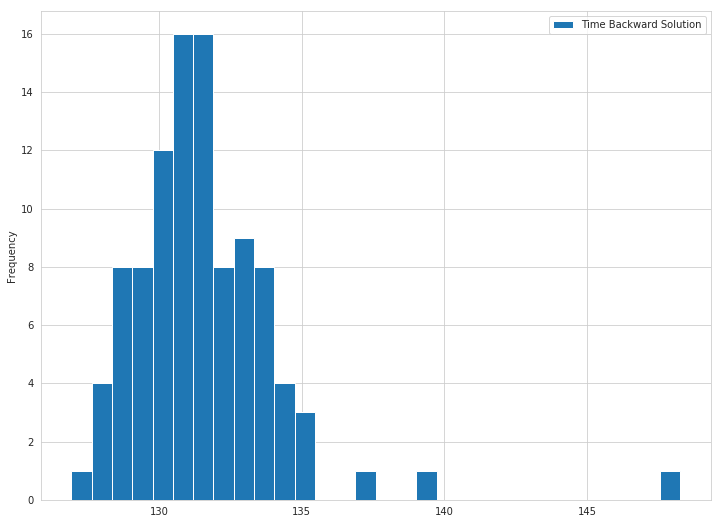

In [23]:
time_nash = pd.read_csv("/home/roi/GM_SG/results/time_nash.log", header=None)
time_nash.columns = ["Time Backward Solution"]
time_nash.plot.hist(bins=30)

In [24]:
print(time_nash.mean())
print(time_nash.std())

Time Backward Solution    131.550384
dtype: float64
Time Backward Solution    2.663957
dtype: float64


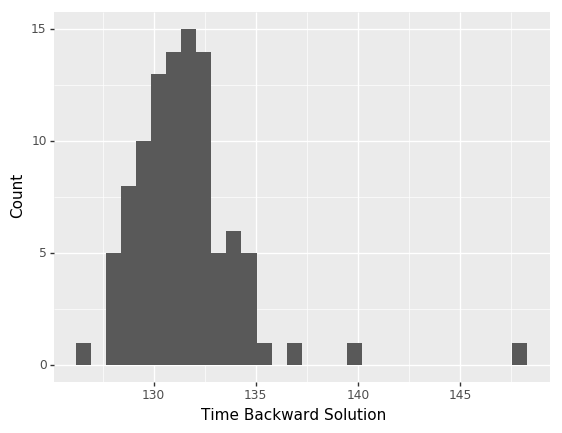

<ggplot: (8770107982344)>

In [25]:
p = ggplot(data = time_nash) + geom_histogram(aes(x="Time Backward Solution"), bins = 30)
p = p + ylab("Count")
p